<div dir="rtl">

# ברוכים הבאים לפרויקט גמר
    
### לפרויקט שני חלקים 
    
## חלק ראשון:
    
### בחלק הראשון נעסוק בתאונות של עובדים במפעלי צעצועים בסין. 
    
### במפעלים אלו הפועלים עובדים שעות ארוכות עם מכונות מסוכנות והרבה מהם נפצעים במהלך עבודתם. 
    
### בחלק הראשון של הפרויקט נרצה למצוא את ההסתברות לפציעה בשעה מסוימת ביום
    
### יש לנו מספר משתנים מסבירים: 

* age: the worker age (continuous)
* expirience: the number of years the worker is in the factory (continuous)
* hour: the hour of the shift (continous). That is, the first, seconmd
* worker_rank: workers are being ranked by their employer, the higher the rank the more senior the worker is. Ranks are between 0 to 5 (continuous)
* days: day of the week (categorical)
* toys: the type of the toy (categorical)
* factory: the factory location refers to a city in china (categorical)
* month: the month in the year (categorical)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statsmodels.api as sm
import pickle as pkl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from statsmodels.discrete.discrete_model import Logit
from sklearn.model_selection import train_test_split
from statsmodels.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from scipy.stats import chisquare
from sklearn.metrics import roc_curve,auc
from sklearn.ensemble import RandomForestClassifier

C:\Users\HP\AppData\Local\Temp\ipykernel_4216\2889429977.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data1 = pkl.load(open('C:/Users/HP/Desktop/Project212016364/df_task_1_group_48.pkl', 'rb'))

In [3]:
data1.head()

,age,expirience,hour,worker_rank,days_c,toys_c,factories_rand_c,months_c,safety_event
0,26,1,6,0,Friday,spinner,Bengbu,October,0
1,25,2,2,1,Tuesday,puzzels,Huainan,April,1
2,26,1,9,0,Tuesday,electric_toys,Huangshan,January,1
3,27,8,4,4,Monday,puzzels,Huainan,May,1
4,28,1,7,0,Wednesday,puzzels,Ma’anshan,April,1


<div dir="rtl">

## לפניך מספר מטלות:
### 1. להציג scatter plot עבור כל זוג משתנים מסבירים ולחשב קורלציה (r) בין כל זוג. האם יש זוג משתנים שיש בינהם קשר? אם כן, אילו? 

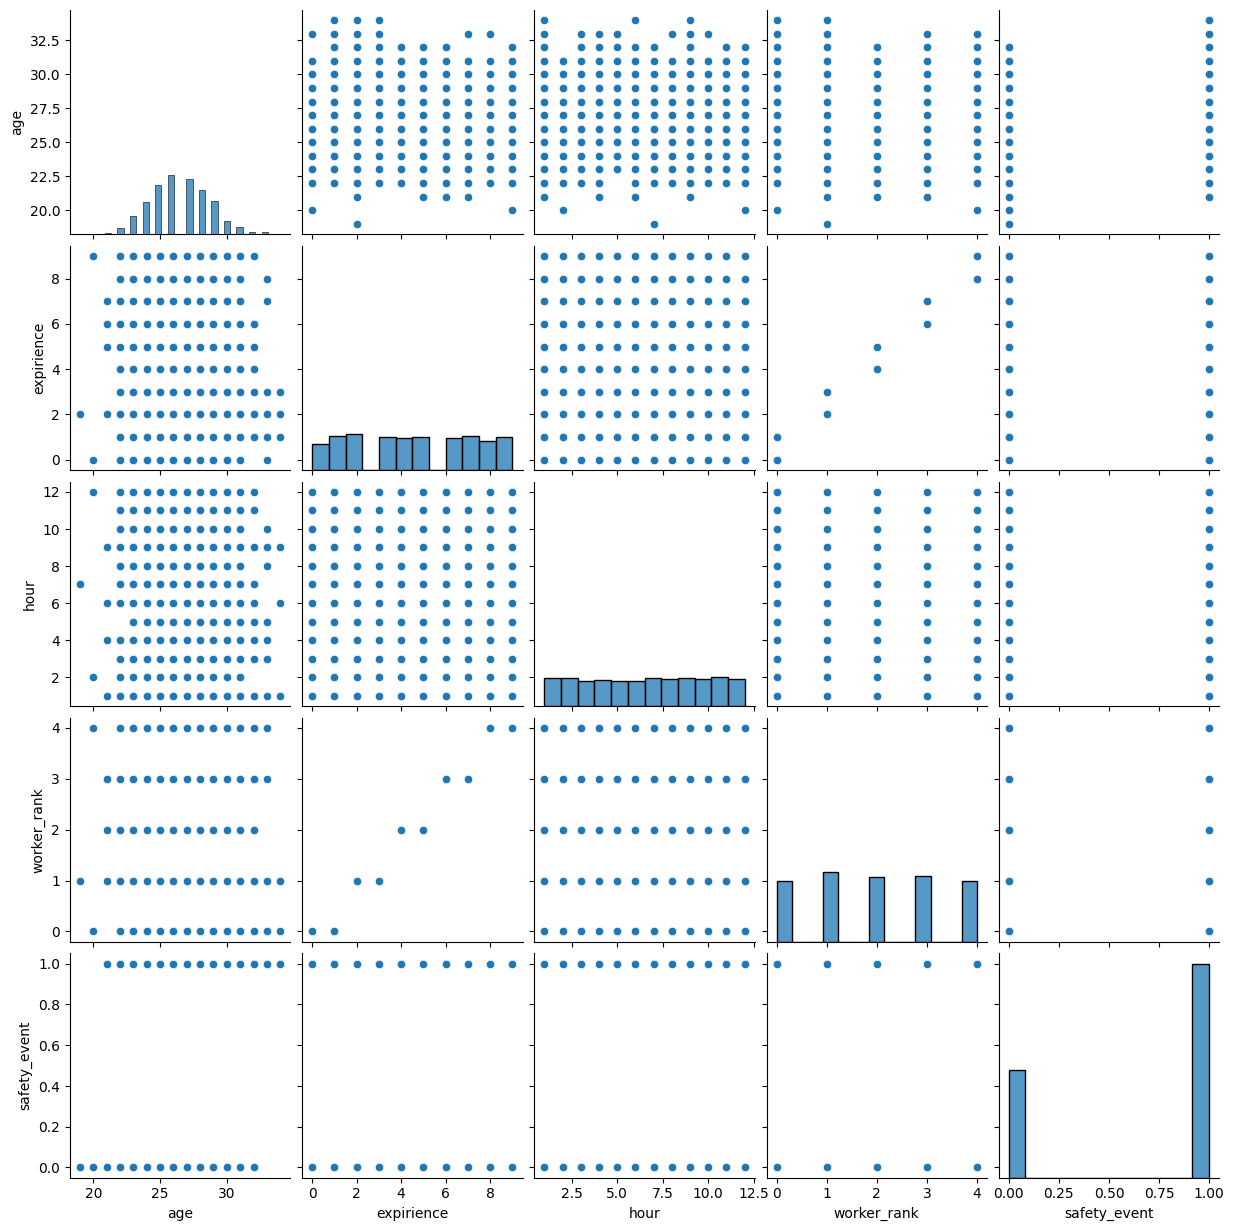

In [4]:
plot1 = sns.pairplot(data1[['age','expirience','hour','worker_rank',	'safety_event']])
plt.show(plot1)

In [5]:
corr_matrix = data1[['age','expirience','hour','worker_rank','safety_event']].corr()

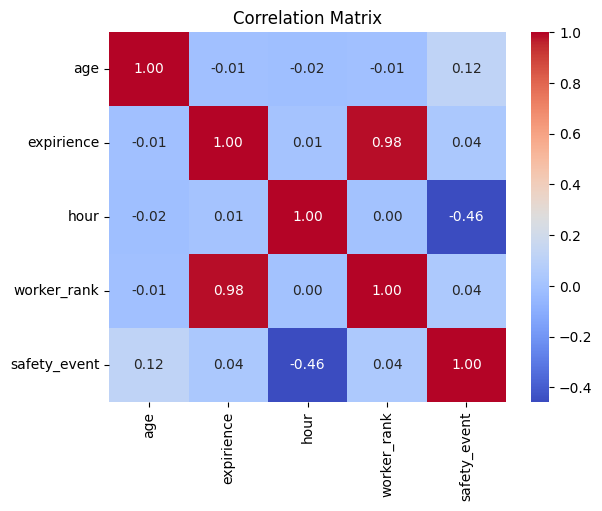

In [6]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<div dir="rtl">

## אפשר לראות שיש קורלציה בין נסיון לדירוג העובד 0.98 

<div dir="rtl">


    

### 2. בחרו שני משתנים קטגוריאליים. 
### הציגו בשני גרפים שונים את מספר העובדים שעברו תאונה לעומת אלו שלא עברו תאונה (בצבעים שונים תאונה לעומת לא תאונה), עבור כל אחת מהקטגוריות בנפרד. 
### עבור כל אחד מהמשתנים בדקו האם אתם מזהים קטגוריה מסוימת שעבורה יש יותר סיכוי לתאונה בהשוואה לקטגוריות האחרות שבאותו משתנה? 
### אם כן, מהי אותה קטגוריה בכל אחד מהמשתנים שבחרתם? 
### בהתחשב בתשובתכם, מה לדעתכם הסבירות שהמקדמים של המשתנים שבחרתם יהיו מובהקים כחלק מרגרסיה לוגיסטית?

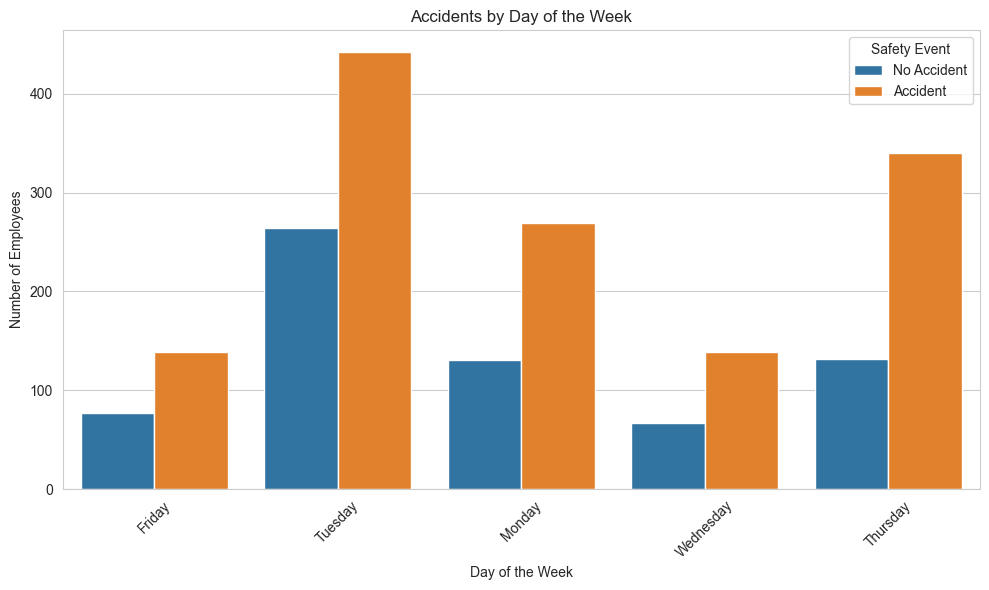

In [7]:
sns.set_style("whitegrid")

# Plot for 'days_c' - Accidents by Day of the Week
plt.figure(figsize=(10, 6))
sns.countplot(data=data1, x='days_c', hue='safety_event', palette=['#1f77b4', '#ff7f0e'])
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Employees')
plt.legend(title='Safety Event', labels=['No Accident', 'Accident'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
data1.groupby("days_c")["safety_event"].value_counts(normalize=True).mul(100).round(2).unstack()


safety_event,0,1
days_c,,
Friday,35.65,64.35
Monday,32.75,67.25
Thursday,27.97,72.03
Tuesday,37.39,62.61
Wednesday,32.52,67.48


<div dir="rtl">

## אני מזהה שביום שלישי שיש אירועים גדולה מכל  כמות האירועים שבשבוע 
## גם הסיכוי לתאונה יותר גדול באותו עיום 

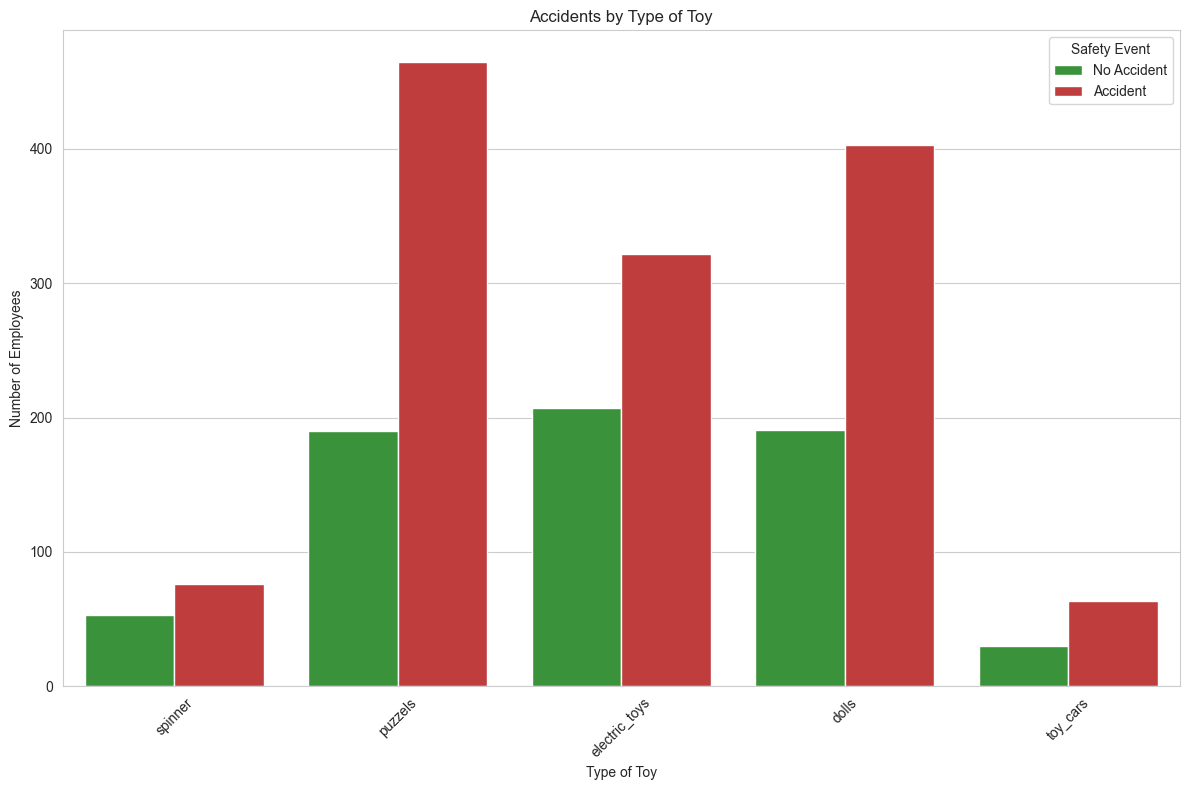

In [9]:
# Plot for 'toys_c' - Accidents by Type of Toy
plt.figure(figsize=(12, 8))
sns.countplot(data=data1, x='toys_c', hue='safety_event', palette=['#2ca02c', '#d62728'])
plt.title('Accidents by Type of Toy')
plt.xlabel('Type of Toy')
plt.ylabel('Number of Employees')
plt.legend(title='Safety Event', labels=['No Accident', 'Accident'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
data1.groupby("toys_c")["safety_event"].value_counts(normalize=True).mul(100).round(2).unstack()


safety_event,0,1
toys_c,,
dolls,32.15,67.85
electric_toys,39.13,60.87
puzzels,29.01,70.99
spinner,41.09,58.91
toy_cars,32.26,67.74


<div dir="rtl">

## אפשר לראות שיש יותר אירועי בטיחות במשחק הפאזל 

<div dir="rtl">


    

### 3. הציגו בגרף של שני עמודות את מספר התאונות לעומת לא-תאונות עבור כלל העובדים. חשבו את הסיכוי לתאונה וללא תאונה. האם הנתונים מאוזנים?

C:\Users\HP\AppData\Local\Temp\ipykernel_4216\227406950.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accident_counts.index, y=accident_counts.values, palette=['#4C9F70', '#FF6B6B'])


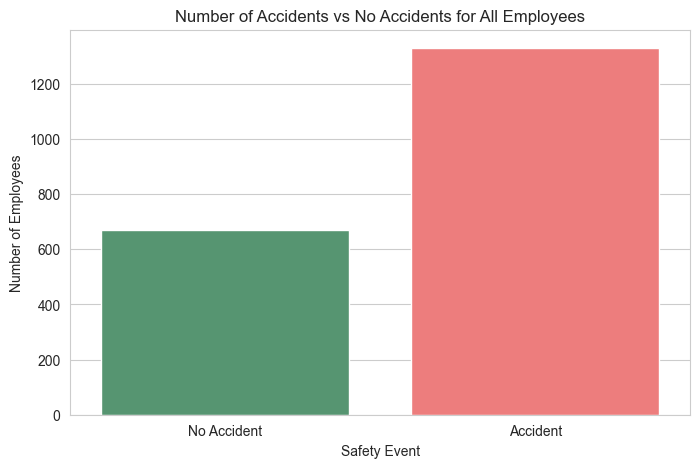

In [11]:
# Count the number of accidents vs no accidents
accident_counts = data1['safety_event'].value_counts()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=accident_counts.index, y=accident_counts.values, palette=['#4C9F70', '#FF6B6B'])
plt.title('Number of Accidents vs No Accidents for All Employees')
plt.xlabel('Safety Event')
plt.ylabel('Number of Employees')
plt.xticks([0, 1], ['No Accident', 'Accident'])  # Assuming 0 is No Accident and 1 is Accident
plt.show()

In [12]:
# Calculating the probability
total_employees = len(data1)
prob_no_accident = accident_counts[0] / total_employees
prob_accident = accident_counts[1] / total_employees
print(f"Probability of No Accident: {prob_no_accident:.2f}")
print(f"Probability of Accident: {prob_accident:.2f}")

Probability of No Accident: 0.34
Probability of Accident: 0.66


<div dir="rtl">


### קל לראות לפי האיור שהסיכוי לאירועי בטיחות גדול 

### 

###

<div dir="rtl">


    

### 4. נא להוציא הסטוגרמה של אחד המשתנים הרציפים. יש להסביר במשפט מה הנתונים מה מציגים (טווח, היכן יש ריכוז גבוה) 

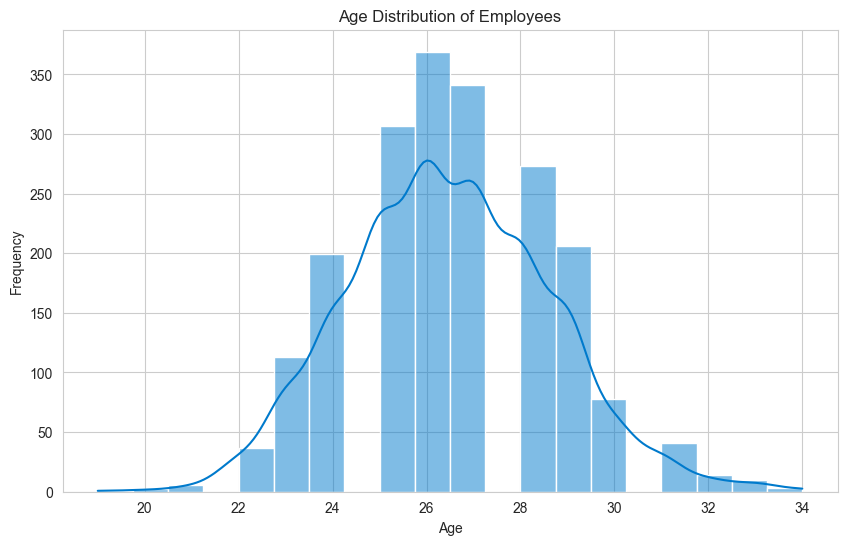

In [13]:
sns.set_style("whitegrid")
# Plotting the histogram for the 'age' variable
plt.figure(figsize=(10, 6))
sns.histplot(data1['age'], bins=20, kde=True, color='#007acc')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [14]:
age_min = data1['age'].min()
age_max = data1['age'].max()
age_mean = data1['age'].mean()

print(f"The histogram shows the distribution of employee ages ranging from {age_min} to {age_max} years.")
print(f"There is a higher concentration of employees around the mean age of {age_mean:.2f} years, indicating the most common age range among the workforce.")

The histogram shows the distribution of employee ages ranging from 19 to 34 years.
There is a higher concentration of employees around the mean age of 26.48 years, indicating the most common age range among the workforce.


<div dir="rtl">

### העובדים הם בין גיל קל לרות שהממוצע נע סביב ורוב העובדים הם בגיל 24-29 
### הגיל מתפלג נורמאלי 
### בין 20 -34  

<div dir="rtl">


    


### 5. לפני שמתחילים את הניתוח הלוגיסטי - נא לפצל את כל הנתונים לtrain -ו test לפי יחס של 30-70


In [15]:
data1.insert(0, 'intercept', 1)

In [16]:
variables =['days_c','toys_c','factories_rand_c','months_c']
dummy = pd.get_dummies(data1, prefix=variables, drop_first=True).astype(int)
prediction = pd.concat([dummy], axis=1)
prediction.head()


,intercept,age,expirience,hour,worker_rank,safety_event,days_c_Monday,days_c_Thursday,days_c_Tuesday,days_c_Wednesday,...,months_c_December,months_c_February,months_c_January,months_c_July,months_c_June,months_c_March,months_c_May,months_c_November,months_c_October,months_c_September
0,1,26,1,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,25,2,2,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,26,1,9,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,1,27,8,4,4,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,28,1,7,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Define your predictors (features) and the target variable
X = prediction.drop('safety_event', axis=1)  # Assuming 'safety_event' is the target variable
y = prediction['safety_event']
# Splitting the dataset into the Training set and Test set with a 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


<div dir="rtl">


### 6. נא למצוא את משוואת הרגרסיה הלוגיסטית. יש להוציא את כל המשתנים הלא מובהקים ולעשות איטרציות עד אשר מגיעים למשוואה שכולם מובהקים. עבור כל איטרציה שמוצאים משתנים יש לחשב את הAIC ו-BIC. למי יש את הכי נמוך? למה נראה לך שזו התוצאה שהתקבלה.

In [18]:
logit_for_model_1 = sm.Logit(y_train,X_train)
model = logit_for_model_1.fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.465988
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           safety_event   No. Observations:                 1400
Model:                          Logit   Df Residuals:                     1371
Method:                           MLE   Df Model:                           28
Date:                Fri, 05 Apr 2024   Pseudo R-squ.:                  0.2573
Time:                        07:41:32   Log-Likelihood:                -652.38
converged:                       True   LL-Null:                       -878.37
Covariance Type:            nonrobust   LLR p-value:                 4.896e-78
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
intercept                     -1.2772      0.953     -1.340      0.180      

In [19]:
model.aic

1362.7663714604287

In [20]:
model.bic

1514.8489694129257

In [21]:
NotMovhak = ['age','hour','days_c_Thursday','factories_rand_c_Huainan','factories_rand_c_Ma’anshan' ,'months_c_October','months_c_September','months_c_February'  ]
X_train = X_train[NotMovhak]
X_test = X_test[NotMovhak]
logit_for_model_2 = sm.Logit(y_train,X_train)
model = logit_for_model_2.fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.476770
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           safety_event   No. Observations:                 1400
Model:                          Logit   Df Residuals:                     1392
Method:                           MLE   Df Model:                            7
Date:                Fri, 05 Apr 2024   Pseudo R-squ.:                  0.2401
Time:                        07:41:32   Log-Likelihood:                -667.48
converged:                       True   LL-Null:                       -878.37
Covariance Type:            nonrobust   LLR p-value:                 5.068e-87
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
age                            0.1316      0.008     16.888      0.000      

In [22]:
model.aic

1350.9564893417435

In [23]:
model.bic

1392.9103094665702

In [24]:
NotMovhak2 = ['age','hour','days_c_Thursday','factories_rand_c_Huainan','factories_rand_c_Ma’anshan' ,'months_c_October','months_c_September']
X_train = X_train[NotMovhak2]
X_test = X_test[NotMovhak2]
logit_for_model_3 = sm.Logit(y_train,X_train)
model = logit_for_model_3.fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.477387
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           safety_event   No. Observations:                 1400
Model:                          Logit   Df Residuals:                     1393
Method:                           MLE   Df Model:                            6
Date:                Fri, 05 Apr 2024   Pseudo R-squ.:                  0.2391
Time:                        07:41:32   Log-Likelihood:                -668.34
converged:                       True   LL-Null:                       -878.37
Covariance Type:            nonrobust   LLR p-value:                 1.361e-87
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
age                            0.1305      0.008     16.897      0.000      

In [25]:
B0 = model.params['age']
B1 = model.params['hour']
B2 = model.params['days_c_Thursday']
B3 = model.params['factories_rand_c_Huainan']
B4 = model.params['factories_rand_c_Ma’anshan']
B5 = model.params['months_c_October']
B6 = model.params['months_c_September']

B0 , B1 , B2 , B3 , B4 , B5 , B6 

(0.1305446512965184,
 -0.35693999301998464,
 0.3722088868151223,
 0.39976770454566257,
 -0.8047115285039235,
 -0.6658725329608065,
 -4.421115676414805)


#  $$ p = {1}\{1+e^{-(-0.130+(-0.356)×hour+(0.372)×days_c_Thursday+(0.399)×factories_rand_c_Huainan+(-0.804)xfactories_rand_c_Ma’anshan+(+0.665)xmonths_c_October+(-4.421)xmonths_c_September)}} $$ 

<div dir="rtl">
    
### 7. מה הסיכוי לתאונה עבור מצב שכל משתני הדמה במצב בסיס שלהם וכל המשתנים הרציפים עם הערך הממוצע של המשתנה בtrain set?

In [26]:
predDF = prediction[['age','hour','days_c_Thursday','factories_rand_c_Huainan','factories_rand_c_Ma’anshan','months_c_October','months_c_September']]
predDF[['days_c_Thursday','factories_rand_c_Huainan','factories_rand_c_Ma’anshan','months_c_October','months_c_September']] = 0
predDF.loc[:, 'age'] = predDF['age'].mean()
predDF.loc[:, 'hour'] = predDF['hour'].mean()
predDF.head(1)

C:\Users\HP\AppData\Local\Temp\ipykernel_4216\829571783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predDF[['days_c_Thursday','factories_rand_c_Huainan','factories_rand_c_Ma’anshan','months_c_October','months_c_September']] = 0
C:\Users\HP\AppData\Local\Temp\ipykernel_4216\829571783.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '26.4795' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  predDF.loc[:, 'age'] = predDF['age'].mean()
C:\Users\HP\AppData\Local\Temp\ipykernel_4216\829571783.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '6.55' has dtype in

,age,hour,days_c_Thursday,factories_rand_c_Huainan,factories_rand_c_Ma’anshan,months_c_October,months_c_September
0,26.4795,6.55,0,0,0,0,0


In [27]:
predictions = model.predict(predDF).reset_index()
print(100*predictions.loc[0, 0].round(4) ,'%')

75.38 %


<div dir="rtl">
    
### 8. נרצה כעת להשוות בין 2 קבוצות שונות של משתנה קטגוריאלי כפונקציה של כל הערכים האפשריים של משתנה רציף כלשהו. 
### כלומר נבחר משתנה קטגוריאלי אחד ומשתנה רציף אחד.  
###  נחשב עבור כל ערך של המשתנה הקטגוריאלי את ההסתברות לתאונה כפונקציה של המשתנה הרציף. 
### טווח של המשתנה הרציף צריך להיות בין הערך המינימאלי של הtrain set לערך המקסימלי.
### הערכים של שאר המשתנים: עבור המשתנים הקטגוריאלים נכניס את הערך 0. ועבור שאר המשתנים הרציפים (אם יש כאלו) נכניס את הערך הממוצע של הtrain set. 
### יש לחשב את ההסתברות ולהוציא גרף שמראה את שתי העקומות שהתקבלו
### האם ניתן לראות בבירור איזו קטגוריה יותר מועדת לתאונות?

In [28]:
predData1  = X_train[['age','hour','days_c_Thursday','factories_rand_c_Huainan','factories_rand_c_Ma’anshan','months_c_October','months_c_September']] 
predData1 [['days_c_Thursday','factories_rand_c_Huainan','factories_rand_c_Ma’anshan','months_c_October','months_c_September']] = 0
predData1 .loc[:, 'hour'] = predData1 ['hour'].mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_4216\812198762.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '6.522857142857143' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  predData1 .loc[:, 'hour'] = predData1 ['hour'].mean()


In [29]:
predData2 = predData1
predData2 = predData2.reset_index()
predData2 = predData2.drop('index', axis=1)
values2 = np.linspace(predData1['age'].min(), predData1['age'].max(),len(predData2))
predData2['age'] = values2
predData2['factories_rand_c_Huainan'] = 0
predData2['safety_event2'] = model.predict(predData2)

In [30]:
predData3 = predData1
predData3 = predData3.reset_index()
predData3 = predData3.drop('index', axis=1)
values3 = np.linspace(predData1['age'].min(), predData1['age'].max(),len(predData3))
predData3['age'] = values3
predData3['factories_rand_c_Huainan'] = 1
predData3['safety_event3'] = model.predict(predData3)


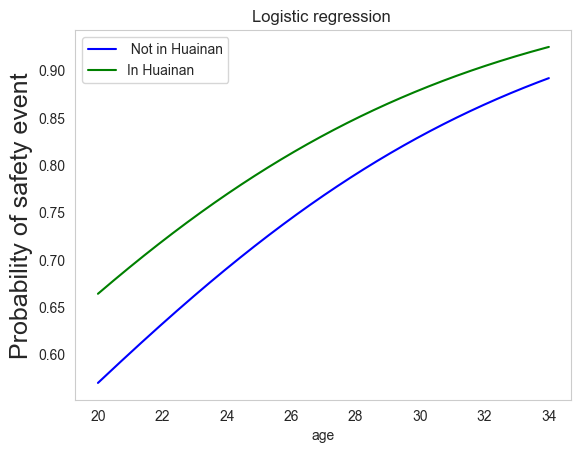

In [31]:
plt.figure()
sns.lineplot(x='age', y='safety_event2', data=predData2, label=' Not in Huainan', marker=None, linestyle='-', color='blue')
sns.lineplot(x='age', y='safety_event3', data=predData3, label='In Huainan', marker=None, linestyle='-', color='green')
plt.ylabel('Probability of safety event',  fontsize = 18)
plt.grid()
plt.title('Logistic regression ')
plt.legend()
plt.show()

<div dir="rtl">
    
    
### 9. בהמשך לסעיף 8 יש לחשב את הodd ratio  כפונקציה של המשתנה הרציף. נא להוציא גרף שמראה את התוצאה. יש להסביר את התוצאה שקיבלתם ולמה הגרף נראה כפי שהוא נראה. בנוסף יש לחשב את הlog odd ratio מה המשמעות שלו?
### סעיפים 10-12 מתייחסים לtest set.

In [32]:
odds_ratio =( predData2['safety_event2'] / (1 - predData2['safety_event2']) ) / ((predData3['safety_event3'] / (1 - predData3['safety_event3'])))
odds_ratio

0       0.670476
1       0.670476
2       0.670476
3       0.670476
4       0.670476
          ...   
1395    0.670476
1396    0.670476
1397    0.670476
1398    0.670476
1399    0.670476
Length: 1400, dtype: float64

In [33]:
log_odds_ratio = np.log(odds_ratio)
log_odds_ratio

0      -0.399768
1      -0.399768
2      -0.399768
3      -0.399768
4      -0.399768
          ...   
1395   -0.399768
1396   -0.399768
1397   -0.399768
1398   -0.399768
1399   -0.399768
Length: 1400, dtype: float64

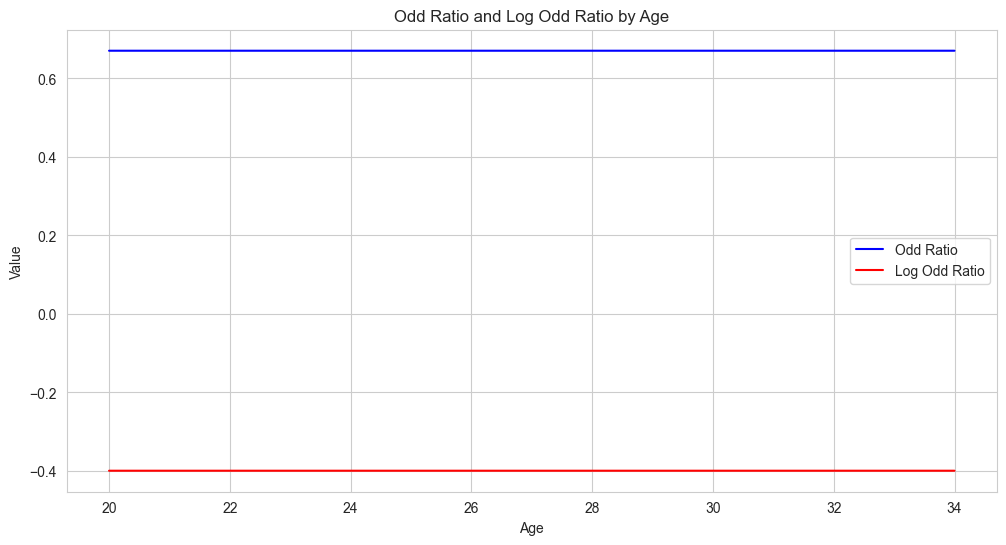

In [34]:

plt.figure(figsize=(12, 6))
plt.plot(predData2['age'], odds_ratio, label='Odd Ratio', color='blue')
plt.plot(predData2['age'], log_odds_ratio, label='Log Odd Ratio', color='red')
plt.xlabel('Age')
plt.ylabel('Value')
plt.title('Odd Ratio and Log Odd Ratio by Age')
plt.legend()
plt.grid(True)
plt.show()


<div dir="rtl">
        

### 10. נא להציג את הconfusion matrix
###  מהו הערך סף המקסימלי כך שה-sensitivity יהיה לפחות 0.8? יש לעשות זאת עבור הtest set.


In [35]:
X_test['prediction1'] = model.predict(X_test)
X_test['classification'] = X_test['prediction1'].apply(lambda x: 1 if x >0.5  else 0)
X_test['safety_event'] = y_test
X_test

,age,hour,days_c_Thursday,factories_rand_c_Huainan,factories_rand_c_Ma’anshan,months_c_October,months_c_September,prediction1,classification,safety_event
1860,29,7,0,0,0,0,0,0.783675,1,1
353,25,3,0,0,0,0,0,0.899601,1,1
1333,26,4,0,0,0,0,0,0.877224,1,1
905,25,8,0,1,0,0,0,0.691654,1,0
1289,27,8,1,1,0,0,0,0.808635,1,1
...,...,...,...,...,...,...,...,...,...,...
148,26,11,1,1,0,1,0,0.395064,0,0
1554,24,2,0,1,0,0,0,0.943692,1,1
1956,29,4,0,1,0,0,0,0.940353,1,1
925,30,4,0,0,0,0,0,0.923337,1,1


In [36]:
TP = X_test.loc[(X_test['safety_event']==1)&(X_test['classification']==1), :].shape[0]
FP = X_test.loc[(X_test['safety_event']==0)&(X_test['classification']==1), :].shape[0]
TN = X_test.loc[(X_test['safety_event']==0)&(X_test['classification']==0), :].shape[0]
FN = X_test.loc[(X_test['safety_event']==1)&(X_test['classification']==0), :].shape[0]

TP, FP, TN, FN

(335, 98, 124, 43)

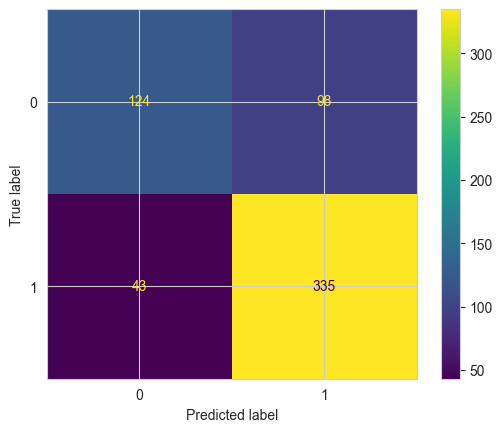

In [37]:
cm = confusion_matrix(X_test['safety_event'], X_test['classification'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=np.array([0,1]))
disp.plot()

plt.show()

In [38]:
sencetivity = cm[1,1]/(cm[1,1]+cm[1,0])
sencetivity

0.8862433862433863

In [39]:
# Assuming X_test['prob_preds'] and X_test['safety_event'] are defined
thresh = np.linspace(0, 1, 100)
found_threshold = None
found_sensitivity = None
# Reverse iterate over thresholds to find the first that meets the sensitivity >= 0.8 criterion
for i in reversed(thresh):
    classification = (X_test['prediction1'] > i).astype(int)
    cm = confusion_matrix(X_test['safety_event'], classification)
    TP = cm[1, 1]
    FN = cm[1, 0]
    # Avoid division by zero by checking if the denominator is not zero
    if (TP + FN) != 0:
        sensitivity = TP / (TP + FN)
        if sensitivity >= 0.8:
            found_threshold = round(i, 3)
            found_sensitivity = round(sensitivity, 3)
            break

# Output the results
if found_sensitivity is not None:
    print(f"Found Threshold: {found_threshold}")
    print(f"Found Sensitivity: {found_sensitivity}")
else:
    print("No threshold found that achieves the desired sensitivity of >= 0.8.")

Found Threshold: 0.636
Found Sensitivity: 0.802


<div dir="rtl">
    
### 11. יש להוציא ROC curve עבור המודל הסופי ולחשב את הAUC. 

In [40]:
threshold = 1

X_test['classification'] = X_test['prediction1'].apply(lambda x: 1 if x > threshold else 0)

y_pred =  X_test['classification']
y = X_test['safety_event']
confusion_matrix_ = confusion_matrix(y, y_pred)


sensitivity_ = confusion_matrix_[1,1]/(confusion_matrix_[1,0]+confusion_matrix_[1,1])
specificty_ = confusion_matrix_[0,0]/(confusion_matrix_[0,1]+confusion_matrix_[0,0])
fpr = 1- specificty_

sensitivity_, fpr

(0.0, 0.0)

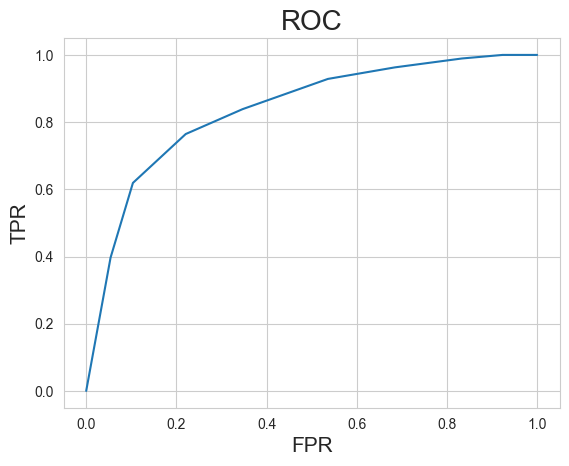

In [41]:
fprs = []
sensi = []
thresholds = np.linspace(0,1,10)

for threshold in thresholds:

    X_test['classification'] = X_test['prediction1'].apply(lambda x: 1 if x > threshold else 0)

    y_pred = X_test['classification']
    y = X_test['safety_event']
    confusion_matrix_ = confusion_matrix(y, y_pred)


    sensitivity = confusion_matrix_[1,1]/(confusion_matrix_[1,0]+confusion_matrix_[1,1])
    specificty = confusion_matrix_[0,0]/(confusion_matrix_[0,1]+confusion_matrix_[0,0])
    fpr = 1-specificty
    
    fprs.append(fpr)
    sensi.append(sensitivity)


plt.figure()
plt.plot( fprs, sensi)
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('ROC', fontsize = 20)
plt.show()

In [42]:
roc_auc = auc(fprs, sensi)
roc_auc

0.837069212069212

<div dir="rtl">


### 12. יש להוציא עוד שני ROC curves. פעם אחת כאשר אתם מוציאים משתנה רציף אחד ופעם שנייה כאשר אתם מוציאים משתנה קטגוריאלי מהמודל. יש להכניס את כל הROC curves כולל את העקומה מסעיף 11 ולשים בגרף אחד. יש להשוות בין שלוש ה-AUC. מה קרה לAUC אחרי שהוצאתם את המשתנה הרציף ואחרי שהוצאתם את המשתנה הקטוגוריאלי? מי הושפע יותר ? מה זה אומר לדעתכם?
    

In [43]:
variables = ['age','hour','days_c_Thursday','factories_rand_c_Huainan','factories_rand_c_Ma’anshan','months_c_October','months_c_September']
X_train3 = X_train[['hour','days_c_Thursday','factories_rand_c_Huainan','factories_rand_c_Ma’anshan','months_c_October','months_c_September']] 
X_train4 = X_train[['age','hour','factories_rand_c_Huainan','factories_rand_c_Ma’anshan','months_c_October','months_c_September']] 

## Without 'age'

In [44]:
model3=sm.Logit(y_train,X_train3)
model3_result=model3.fit()
X_test3 = X_test[['hour','days_c_Thursday','factories_rand_c_Huainan','factories_rand_c_Ma’anshan','months_c_October','months_c_September']] 
probabilities3 = model3_result.predict(X_test3)

Optimization terminated successfully.
         Current function value: 0.638973
         Iterations 7


In [45]:
#  ROC curve for the test set
fpr3, tpr3, thresholds3 = roc_curve(y_test, probabilities3) 


In [46]:
roc_auc3 = auc(fpr3, tpr3)
roc_auc3

0.6459971876638545

## Without 'days_c_Thursday'

In [47]:
model4=sm.Logit(y_train,X_train4)
model4_result=model4.fit()
X_test4 = X_test[['age','hour','factories_rand_c_Huainan','factories_rand_c_Ma’anshan','months_c_October','months_c_September']] 
probabilities4 = model4_result.predict(X_test4)

Optimization terminated successfully.
         Current function value: 0.479228
         Iterations 7


In [48]:
#  ROC curve for the test set
fpr4, tpr4, thresholds4 = roc_curve(y_test, probabilities4) 

In [49]:
roc_auc4 = auc(fpr4, tpr4)
roc_auc4

0.8432003432003432

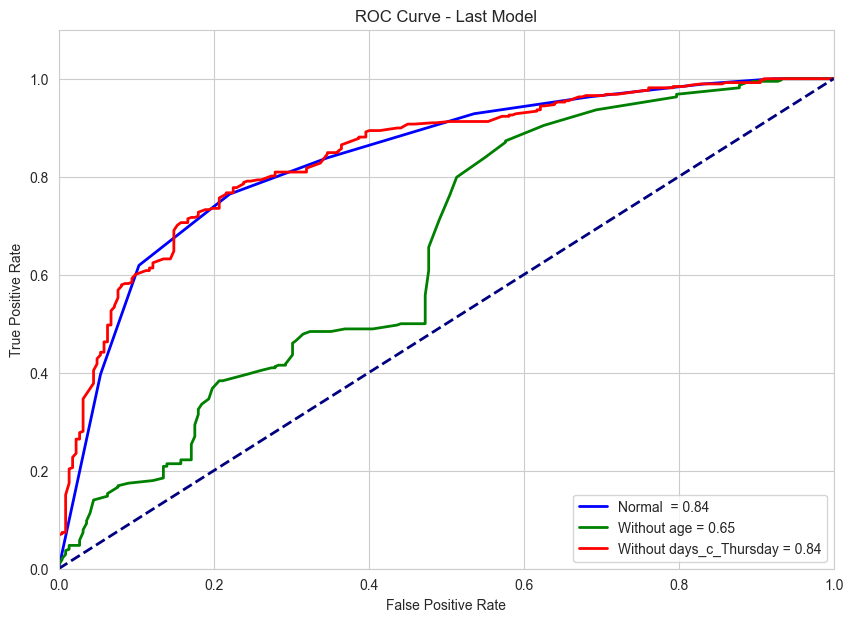

In [50]:
plt.figure(figsize=(10, 7))
plt.plot(fprs, sensi, color='blue', lw=2, label=f'Normal  = {roc_auc:.2f}')
plt.plot(fpr3, tpr3, color='green', lw=2, label=f'Without age = {roc_auc3:.2f}')
plt.plot(fpr4, tpr4, color='red' , lw=2, label=f'Without days_c_Thursday = {roc_auc4:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Last Model')
plt.legend(loc="lower right")
plt.show()


<div dir="rtl">
    
## חלק שני
    
### בחלק זה תעזרו לרלב"ד לחזות כמות מקרים של נהיגה בשכרות.
    
### כידוע נהיגה אחרי ששותים גורם לתאונות דרכים ולכן נרצה להבין תחת אילו מקרים זה קורה לרוב על מנת שהרלב"ד יידע לרכז שם את מאמציו. כמו-כן גם משטרת ישראל יכולה להשתמש במידע זה כאשר היא מציבה ניידות משטרה. 
    
### לפניך dataset עם מספר משתנים מסבירים ומשתנה מוסבר - כמות מקרים של נהגים שנתפסו נוהגים בשכרות בחודש ינואר בקטע כביש מסוים.

* road_lenght - the lenght of kilomoters of the road
* intercept - simply a column of ones to add intercept to the model
* age - the driver's age
* license_year - the number of years the driver hold a license 
* gender - the gender of the driver
* day_time - the time of day: morning, afternoon, evening and night
* drunk driver - the number of drunk drivers are found in that road in January  
    
<div dir="rtl">
    
## הערות
### יש להגיש קובץ pdf עם כל התשובות והגרפים יחד עם הקוד שבו חישבתם את הכל. יש לכווץ את שני הקבצים לקובץ zip בודד ולהגיש למודל.
### כל הגרפים צריכים להיות ברורים, עם שמות לצירים בפונט גדול וברור. אם יש יותר מעקומה או קבוצה (רלוונטי לbar charts ) אחת בגרף חובה להוסיף legend.
    
    

In [74]:
data2 = pkl.load(open('C:/Users/HP/Desktop/Project212016364/drunk_driver_grpoup_48.pkl', 'rb'))
data2.head()

,road_lenght,intercept,age,liscene_year,num_in_car,geneder__c,day_time_rand__c,drunk_driver
0,11.422405,1.0,46,34,4,male,morning,1735
1,20.842587,1.0,30,18,1,male,morning,310
2,24.890703,1.0,43,31,2,female,morning,2496
3,24.000050,1.0,22,17,3,male,morning,261
4,2.717802,1.0,17,17,3,male,evening,29


<div dir="rtl">
    
### 1. נא להוציא הסטוגרמה של מספר הנהגים השיכורים, מה ההתרשמות הכללית?
    

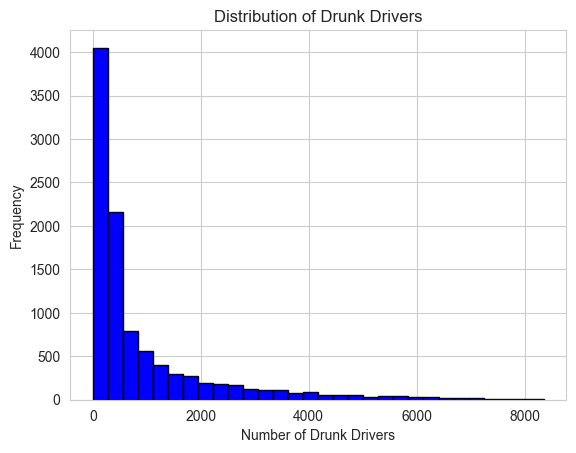

In [52]:
plt.hist(data2['drunk_driver'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Drunk Drivers')
plt.xlabel('Number of Drunk Drivers')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<div dir="rtl">
    
    
### 2. להציג scatter plot עבור כל זוג משתנים מסבירים ולחשב קורלציה (r) בין כל זוג. האם יש זוג משתנים שיש בינהם קשר? אם כן, אילו?

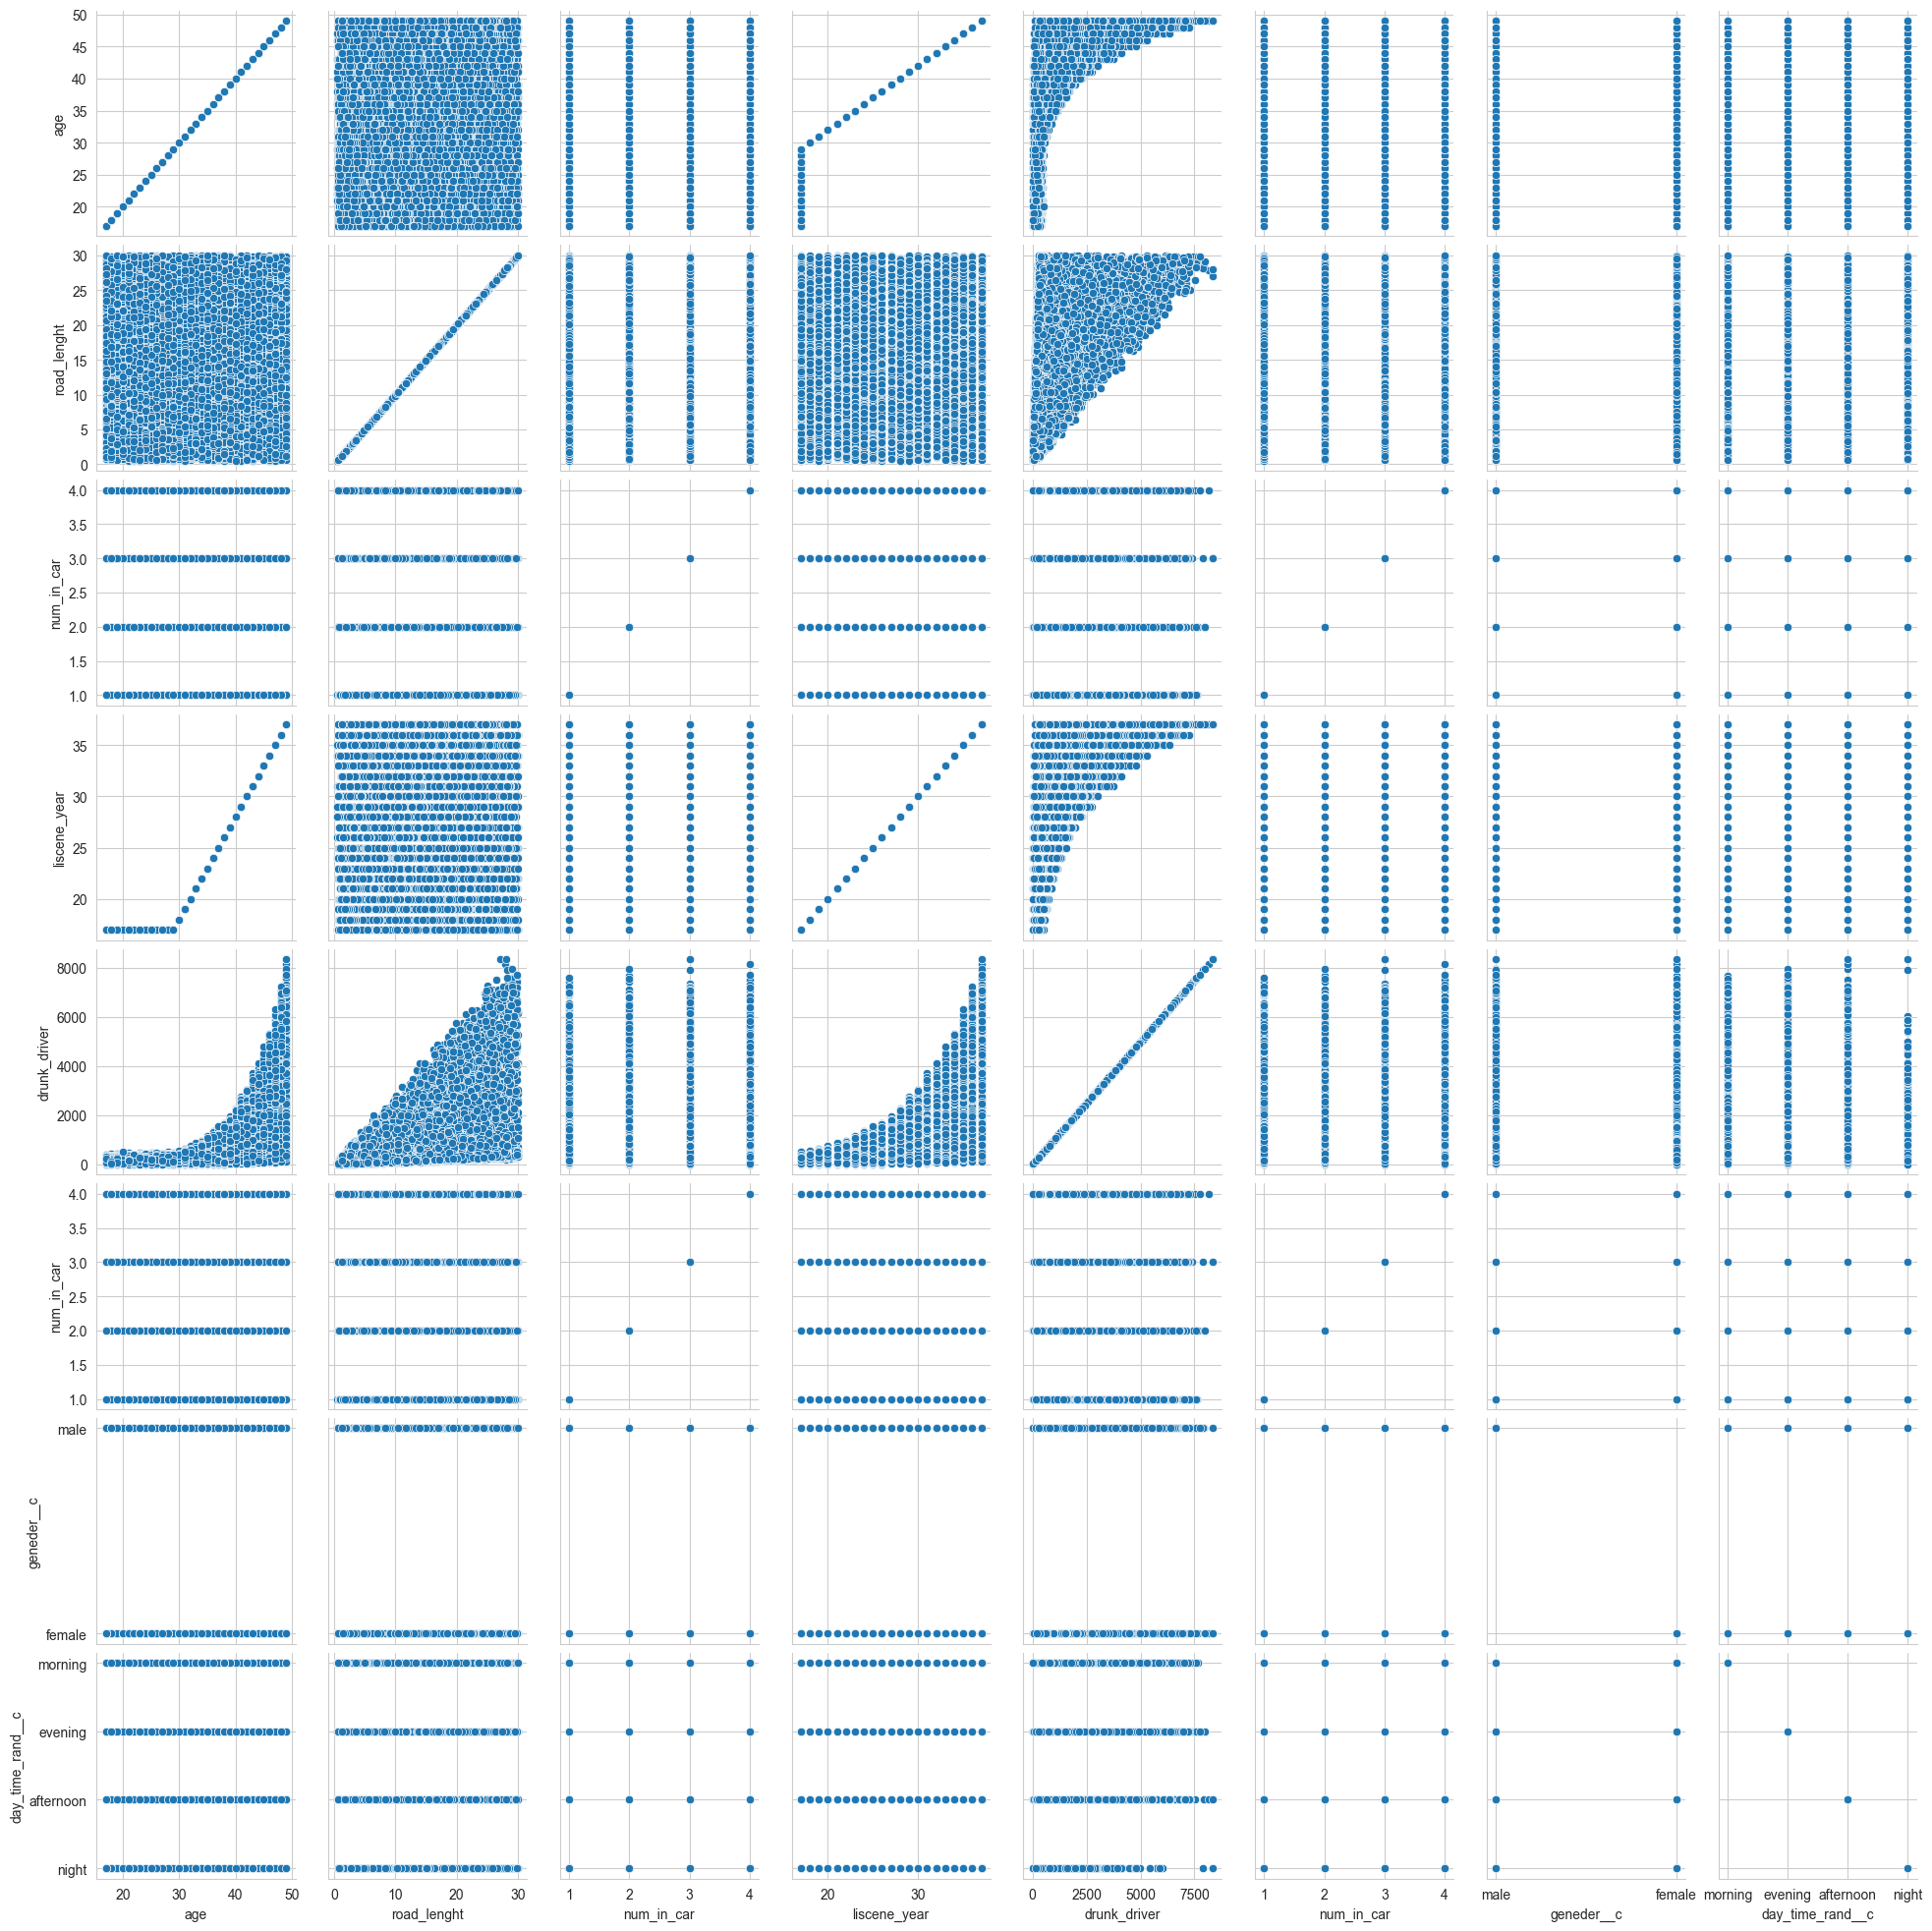

In [53]:
plot2 = sns.pairplot(data2,vars = ['age','road_lenght','num_in_car','liscene_year','drunk_driver','num_in_car','geneder__c','day_time_rand__c'],diag_kind=None)
plt.show(plot2)

In [92]:
corr_matrix2 = pd.get_dummies(data2).astype(int)
corr_matrix2 = corr_matrix2.drop(['intercept'], axis = 1)
corr_matrix2 = corr_matrix2.corr().round(2)

<Axes: >

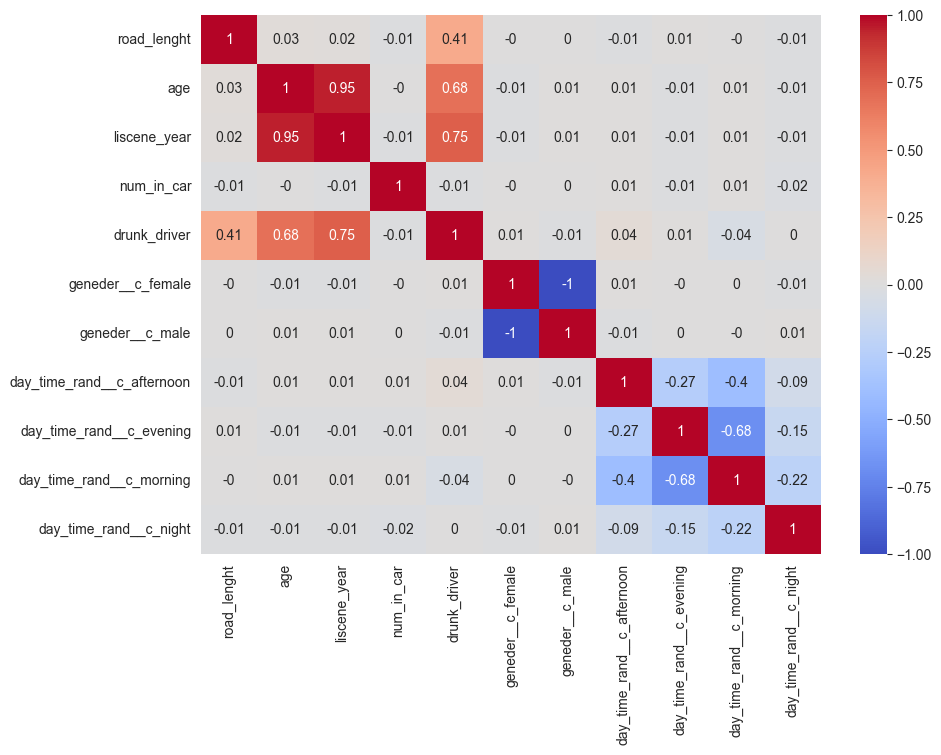

In [94]:

fig, ax = plt.subplots(figsize=(10,7))        
sns.heatmap(corr_matrix2 , cmap ='coolwarm', annot=True)##


### Correlation between drunk driver and road length
### Correlation between age and liscene year
### Correlation between age and drunk driver
### Correlation between drunk driver and liscene year

####

<div dir="rtl">
    
    
### 3.עבור משתנה קטגוריאלי אחד יש להציג bar chart של מספר נהגים שיכורים לק"מ בודד (בממוצע). איזו קבוצה הכי מועדת לפורענות?

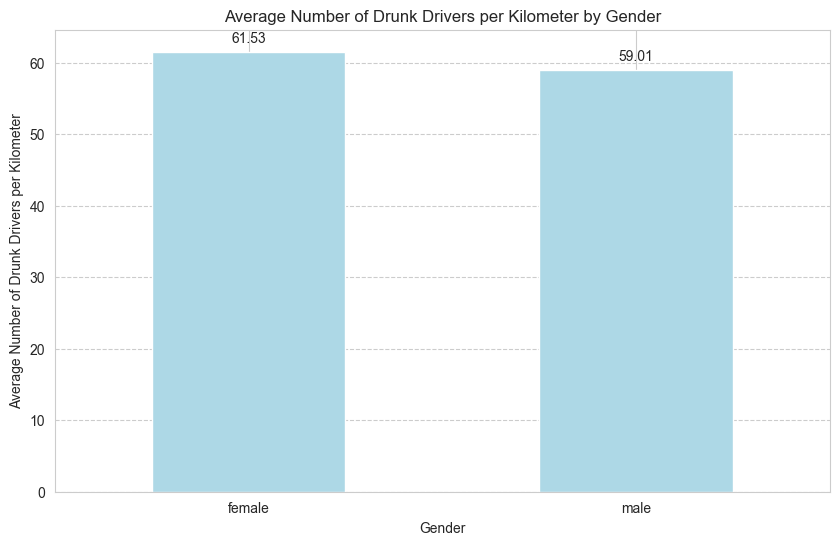

The gender group most prone to offenses is: female


In [57]:
# Calculate the average number of drunk drivers per kilometer for each time of day
data2['drunk_per_km'] = data2['drunk_driver'] / data2['road_lenght'].round(3)
avg_drunk_per_km_by_gender = data2.groupby('geneder__c')['drunk_per_km'].mean().round(3)
plt.figure(figsize=(10, 6))
bars = avg_drunk_per_km_by_gender.plot(kind='bar', color='lightblue')
plt.title('Average Number of Drunk Drivers per Kilometer by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Number of Drunk Drivers per Kilometer')
plt.xticks(rotation=0)  # סיבוב תוויות הציר האופקי אם יש צורך
plt.grid(axis='y', linestyle='--')
for p in bars.patches:
    bars.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()
most_prone_group_gender = avg_drunk_per_km_by_gender.idxmax()
print(f"The gender group most prone to offenses is: {most_prone_group_gender}")

<div dir="rtl">
    
 ###   
### 4. רגרסיה ליניארית: נסו לחזות בעזרת רגרסיה ליניארית את מספר התאונות בקטע כביש.

In [58]:
predB = pd.get_dummies(data2).astype(int)
predB.head()

,road_lenght,intercept,age,liscene_year,num_in_car,drunk_driver,drunk_per_km,geneder__c_female,geneder__c_male,day_time_rand__c_afternoon,day_time_rand__c_evening,day_time_rand__c_morning,day_time_rand__c_night
0,11,1,46,34,4,1735,151,0,1,0,0,1,0
1,20,1,30,18,1,310,14,0,1,0,0,1,0
2,24,1,43,31,2,2496,100,1,0,0,0,1,0
3,24,1,22,17,3,261,10,0,1,0,0,1,0
4,2,1,17,17,3,29,10,0,1,0,1,0,0


In [59]:
model_B = sm.OLS(predB["drunk_driver"], predB[['intercept','road_lenght','age','liscene_year','num_in_car','geneder__c_female','geneder__c_male','day_time_rand__c_afternoon','day_time_rand__c_evening','day_time_rand__c_morning','day_time_rand__c_night']])
model_B_result = model_B.fit()
print(model_B_result.summary())

                            OLS Regression Results                            
Dep. Variable:           drunk_driver   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     3410.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:56:26   Log-Likelihood:                -79363.
No. Observations:               10000   AIC:                         1.587e+05
Df Residuals:                    9991   BIC:                         1.588e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
intercept           

## without num in car ----> P > 0.05

In [60]:
new_model_B = sm.OLS(predB["drunk_driver"], predB[['intercept','road_lenght','age','liscene_year','geneder__c_female','geneder__c_male','day_time_rand__c_afternoon','day_time_rand__c_evening','day_time_rand__c_morning','day_time_rand__c_night']])
new_model_B_result = new_model_B.fit()
print(new_model_B_result.summary())

                            OLS Regression Results                            
Dep. Variable:           drunk_driver   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     3898.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:56:26   Log-Likelihood:                -79363.
No. Observations:               10000   AIC:                         1.587e+05
Df Residuals:                    9992   BIC:                         1.588e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
intercept           

In [61]:
predictionsB = predB[['intercept','road_lenght','age','liscene_year','geneder__c_female','geneder__c_male','day_time_rand__c_afternoon','day_time_rand__c_evening','day_time_rand__c_morning','day_time_rand__c_night']].copy()
predictionsB['predictions'] = new_model_B_result.predict(predictionsB)
predictionsB['drunk_driver'] = predB[['drunk_driver']]
predictionsB

,intercept,road_lenght,age,liscene_year,geneder__c_female,geneder__c_male,day_time_rand__c_afternoon,day_time_rand__c_evening,day_time_rand__c_morning,day_time_rand__c_night,predictions,drunk_driver
0,1,11,46,34,0,1,0,0,1,0,2188.470794,1735
1,1,20,30,18,0,1,0,0,1,0,205.239913,310
2,1,24,43,31,1,0,0,0,1,0,2578.175033,2496
3,1,24,22,17,0,1,0,0,1,0,617.683633,261
4,1,2,17,17,0,1,0,1,0,0,-378.459331,29
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,20,40,28,1,0,0,1,0,0,1958.300832,1511
9996,1,26,35,23,0,1,1,0,0,0,1523.295569,1087
9997,1,8,35,23,0,1,1,0,0,0,438.315154,308
9998,1,28,34,22,0,1,0,0,1,0,1318.883703,775


<div dir="rtl">
    
### 5. נא לבדוק את הנחות המודל - אילו הנחות הופרו?
    

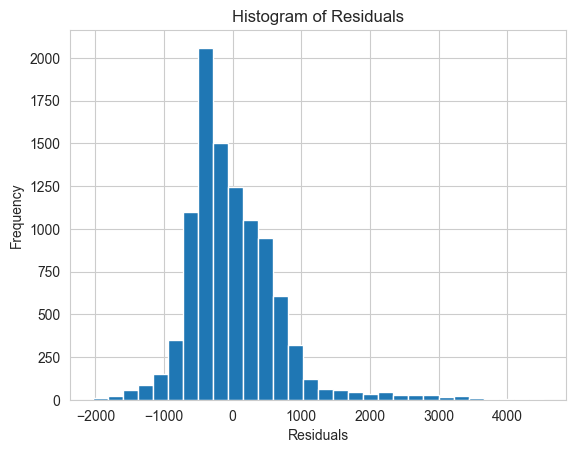

In [62]:
plt.hist(new_model_B_result.resid, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


### norma disturbation

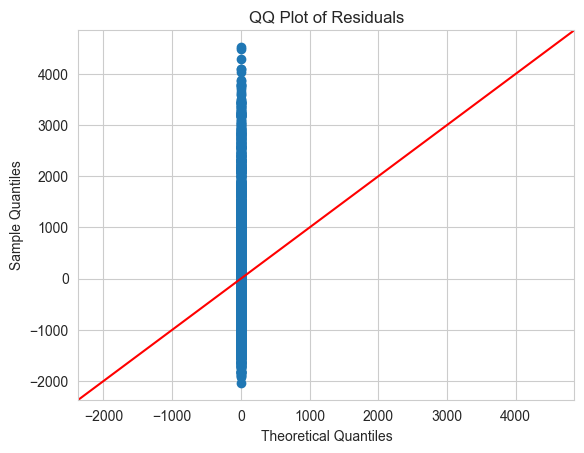

In [63]:
sm.qqplot(new_model_B_result.resid, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

<div dir="rtl">

## ההיסטוגרמה נראית לא ממש סימטרית , זה יכול להיות סימן לאי-נורמליות. זה גם יכול להצביע על השפעות של ערכים חריגים

<div dir="rtl">


## ניתן לראות כי הגרף מתפלג נורמלית

<div dir="rtl">

### 6. יש כעת לעשות רגרסיה פואסונית -נא להוציא משתנים לא מובהקים 

In [64]:

new_model_poisson = sm.GLM(predB['drunk_driver'],
                        predB[['intercept','road_lenght','age','liscene_year','num_in_car','geneder__c_female','day_time_rand__c_evening','day_time_rand__c_morning','day_time_rand__c_night']])  # Poisson regression model
poisson1 = new_model_poisson.fit()
print(poisson1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           drunk_driver   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9991
Model Family:                Gaussian   Df Model:                            8
Link Function:               Identity   Scale:                      4.5845e+05
Method:                          IRLS   Log-Likelihood:                -79363.
Date:                Fri, 05 Apr 2024   Deviance:                   4.5804e+09
Time:                        07:56:27   Pearson chi2:                 4.58e+09
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9347
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
intercept               

## without day_time_rand__c_night , num_in_car 

In [65]:

new_model_poisson2 = sm.GLM(predB['drunk_driver'],
                        predB[['intercept','road_lenght','age','liscene_year','geneder__c_female','day_time_rand__c_evening','day_time_rand__c_morning']])  # Poisson regression model
poisson2 = new_model_poisson2.fit()
print(poisson2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           drunk_driver   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9993
Model Family:                Gaussian   Df Model:                            6
Link Function:               Identity   Scale:                      4.5846e+05
Method:                          IRLS   Log-Likelihood:                -79364.
Date:                Fri, 05 Apr 2024   Deviance:                   4.5814e+09
Time:                        07:56:27   Pearson chi2:                 4.58e+09
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9346
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
intercept               

<div dir="rtl">

## הכל מובהק

<div dir="rtl">

    
### 7. האם רגריסה פואוסנית מתאימה כאן? נמק.י יש לבדוק -4 דרכים שונות

<div dir="rtl">
    
## מבלי להיכנס לפרטים הפורמלים ללמה המבחן הזה הוא זה שעושים רק נראה טכנית איך לעשות את זה:

In [66]:
from scipy.stats import chi2
df1 = poisson2.df_resid
p_value = 1 - chi2.cdf(poisson2.pearson_chi2, df1)
print("Pearson Chi-Square Test p-value:", p_value)

Pearson Chi-Square Test p-value: 0.0


<div dir="rtl">

### Overdispersion parameter: מדד המראה לנו את היחס בין התוחלת לשונות - כאשר נרצה שיהיה כמה שיותר קרוב ל-1. 

In [67]:
R = poisson2.pearson_chi2 / poisson2.df_resid
print(R) 

458456.21388706367


<div dir="rtl">

###  במשתנה מקרי פואסוני ידוע כי תוחלת שווה לשונות    

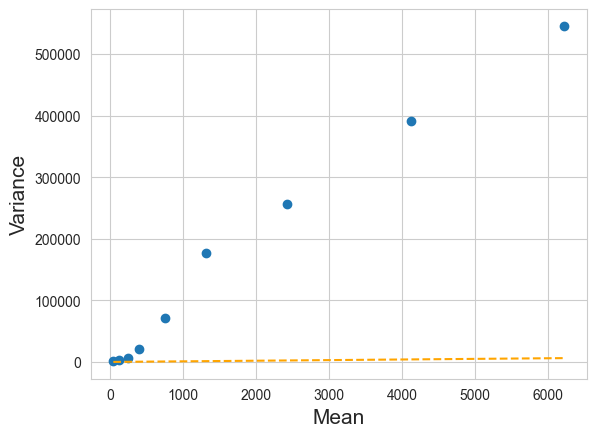

In [68]:
data2['rates'] = poisson2.fittedvalues
lams = np.linspace(data2['rates'].min(),data2['rates'].max(), 10)

means = []
vars_ = []

for lams_ind in range(lams.shape[0]-1):
    
    lb = lams[lams_ind]
    ub = lams[lams_ind+1]
        
    shape = data2.loc[(data2['rates']>lb)& (data2['rates']<ub), 'drunk_driver'].shape
    var = data2.loc[(data2['rates']>lb)& (data2['rates']<ub), 'drunk_driver'].std()**2
    mean = data2.loc[(data2['rates']>lb)& (data2['rates']<ub), 'drunk_driver'].mean()
    
    if shape[0] > 15:
        means.append(mean)
        vars_.append(var)
    
plt.figure()
plt.scatter(means, vars_)
plt.plot(means, means, '--', label='y = x', color = 'orange')
plt.xlabel('Mean', fontsize = 15)
plt.ylabel('Variance', fontsize = 15)
plt.show()

<div dir="rtl">
    
###  שהשונות והתוחלת שונים בכלל ולכן לא מתפלג פואסונית

<div dir="rtl">

### הבדיקה הבאה נראה כי כ95 אחוז מהשגיאות נמצאות +-2 סטיות תקן מהתוחלת.

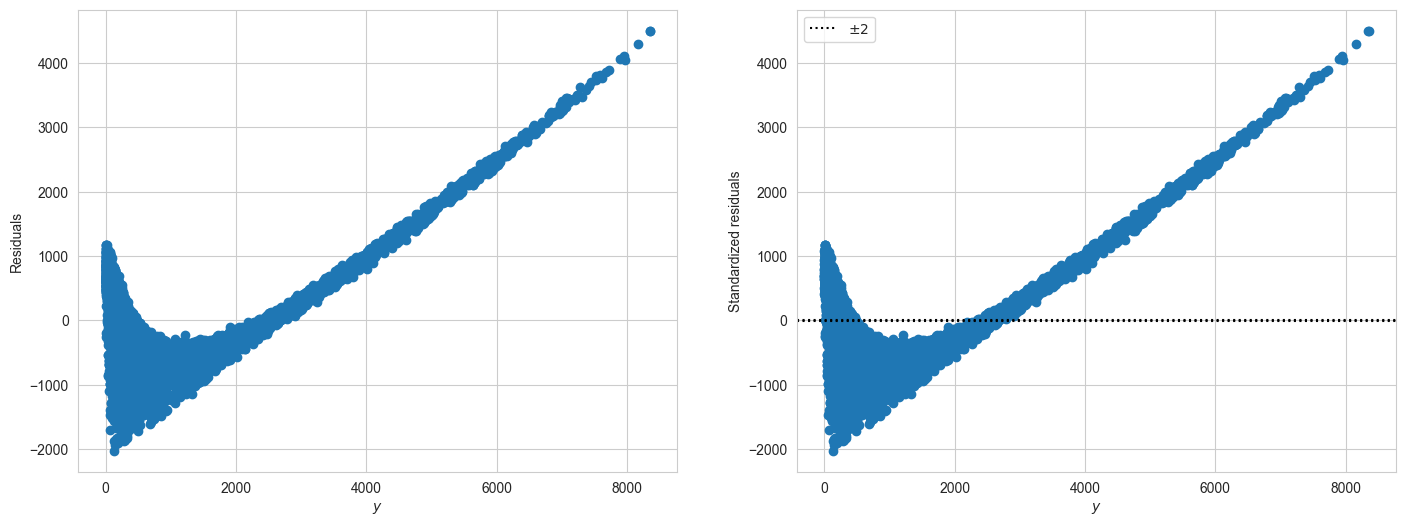

In [69]:
f, axes = plt.subplots(1, 2, figsize=(17, 6))
axes[0].scatter(data2['drunk_driver'], poisson2.resid_response)
axes[0].set_ylabel("Residuals")
axes[0].set_xlabel("$y$")
axes[1].scatter(data2['drunk_driver'], poisson2.resid_pearson)
axes[1].axhline(y=-2, linestyle=':', color='black', label='$\pm 2$')
axes[1].axhline(y=+2, linestyle=':', color='black')
axes[1].set_ylabel("Standardized residuals")
axes[1].set_xlabel("$y$")
plt.legend()
plt.show()

<div dir="rtl">
    
### 8. אם בסעיף 7 התשובה הייתה לא, נא לעשות רגרסיה בינומית שלילית ולבדוק אם היא מתאימה כאן.
###  אם בסעיף 7 התשובה הייתה כן נא לחשב את הIRR של אחד המשתנים הרציפים ולהסביר מה המשמעות שלו במונחים של מספר נהגים שיכורים

In [78]:
negative_model = corr_matrix2
negative_model['intercept'] =1

In [79]:
columns = ['intercept','road_lenght','age','liscene_year','num_in_car','geneder__c_female','day_time_rand__c_evening','day_time_rand__c_morning','day_time_rand__c_night']
X = negative_model[columns]
y = negative_model['drunk_driver']

In [80]:
from statsmodels.discrete.discrete_model import NegativeBinomial

nb = NegativeBinomial(
    y,
    X.drop(columns=["road_lenght"]).values,
    offset=np.log(X["road_lenght"].values),
)

result = nb.fit()
print(pd.DataFrame(result.params).loc['alpha',:])

C:\Users\HP\AppData\Local\Temp\ipykernel_4216\2114013827.py:6: RuntimeWarning: divide by zero encountered in log
  offset=np.log(X["road_lenght"].values),
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:1337: RuntimeWarning: divide by zero encountered in divide
  const = (self.endog / np.exp(offset + exposure)).mean()
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\discrete\discrete_model.py:1337: RuntimeWarning: invalid value encountered in divide
  const = (self.endog / np.exp(offset + exposure)).mean()


         Current function value: nan
         Iterations: 0
         Function evaluations: 2
         Gradient evaluations: 2
0    1.051271
Name: alpha, dtype: float64


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_optimize.py:1397: OptimizeWarning: NaN result encountered.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [83]:
if np.any(np.isnan(y)) or np.any(np.isnan(X.drop(columns=["road_lenght"]))):
    print("NaN values detected in response or predictors.")
if np.any(np.isinf(y)) or np.any(np.isinf(X.drop(columns=["road_lenght"]))):
    print("Inf values detected in response or predictors.")

# Replace 0 with a small value to avoid taking log(0) in 'road_lenght'
X['road_lenght'] = X['road_lenght'].replace(0, np.finfo(float).eps)

# Calculate the offset
offset = np.log(X["road_lenght"])

# Define the model
alpha = 1.051271
model_NB = sm.GLM(
    y,
    X.drop(columns=["road_lenght"]),
    offset=offset,
    family=sm.families.NegativeBinomial(alpha=alpha),
)

# Fit the model
try:
    result_NB = model_NB.fit()
    print(result_NB.summary())
except ValueError as e:
    print(f"An error occurred: {e}")

C:\Users\HP\AppData\Local\Temp\ipykernel_4216\2086270735.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['road_lenght'] = X['road_lenght'].replace(0, np.finfo(float).eps)


                 Generalized Linear Model Regression Results                  
Dep. Variable:           drunk_driver   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9992
Model Family:        NegativeBinomial   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.3382e+05
Date:                Fri, 05 Apr 2024   Deviance:                   4.0571e+05
Time:                        08:09:37   Pearson chi2:                 2.17e+18
No. Iterations:                   100   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
intercept               

In [91]:
NB_R = result_NB.pearson_chi2 / result_NB.df_resid
print(NB_R)

217551359913007.66


In [90]:
NB_arr = result_NB.resid_pearson

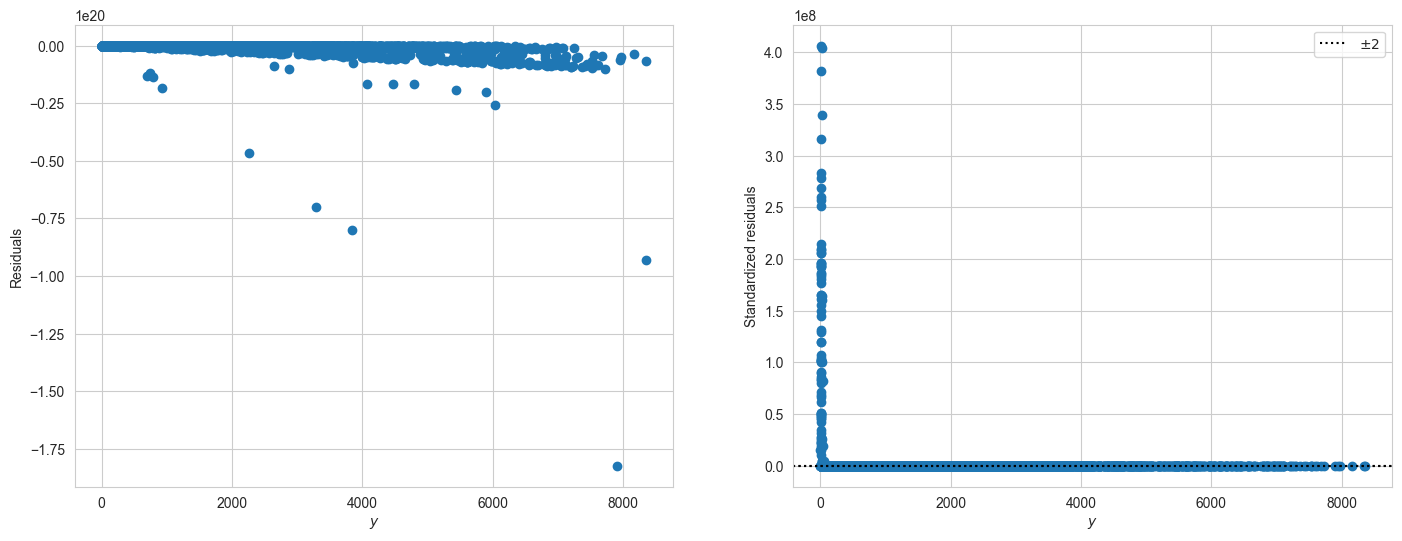

In [87]:
f, axes = plt.subplots(1, 2, figsize=(17, 6))
axes[0].scatter(data2['drunk_driver'], result_NB.resid_response)
axes[0].set_ylabel("Residuals")
axes[0].set_xlabel("$y$")
axes[1].scatter(data2['drunk_driver'], result_NB.resid_pearson)
axes[1].axhline(y=-2, linestyle=':', color='black', label='$\pm 2$')
axes[1].axhline(y=+2, linestyle=':', color='black')
axes[1].set_ylabel("Standardized residuals")
axes[1].set_xlabel("$y$")
plt.legend()
plt.show()

In [89]:
df2 = result_NB.df_resid
p_value = 1 - chi2.cdf(result_NB.pearson_chi2, df2)

print("Pearson Chi-Square Test p-value:", p_value)

Pearson Chi-Square Test p-value: 0.0


## עדיין המודל לא מתאים 
## p value smaller than 0.05 

<div dir="rtl">
    
### 9. predictions: יש להוציא גרף תלת מימדי של תחזית מספר הנהגים הממוצע כפונקציה של שני משתנים רציפים שנכנסו למודל. עבור שאר המשתנים הקטגוריאלים נזין את הערך 0. יש לפלוט באותו גרף שני מישורים כאשר אחד מדווח על האורך כביש של 1 ק"מ ואילו השני מדווח על כביש באורך 5 ק"מ. האם יש הבדל ניכר בין המישורים שקיבלתם, האם ניתן להסביר מבחינה הגיונית את התוצאה? 

In [ ]:
def linear_surface(age, license_year):
    return np.exp(-29.577 +  -0.0695*age +  1.9683*license_year)

X, Y = np.meshgrid(data2['age'],data2['license_year'])
Z1 = linear_surface(X, Y)
Z2 = linear_surface(X, Y)*5


fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')

surf1 = ax.plot_surface(X, Y, Z1,  cmap = plt.cm.cividis, alpha = 0.2, facecolors=plt.cm.cividis(Z1))
surf2 = ax.plot_surface(X, Y, Z2,  cmap = plt.cm.coolwarm, alpha = 0.2)

# Create separate colorbars for each surface
cb1 = fig.colorbar(surf1, shrink=0.5, aspect=8, label='1_KM')
cb2 = fig.colorbar(surf2, shrink=0.5, aspect=8, label='5_KM')


# Set axes label
ax.set_ylabel('license_year', fontsize=15)
ax.set_xlabel('Age', fontsize=15)
ax.set_zlabel('Drunk Drivers', fontsize=15)
plt.title('Number of Drunk Drivers', fontsize=20)

ax.view_init(elev=10, azim=50)
plt.show()